# Day 3: Multiple Linear Regression

Work can be found in day_3_multiple_linear_regression.ipynb.
The aim is to model the relationship between two or more features and a response by fitting a linear equation to observed data. The most important factor that influences the predicted outcome can also be assessed.

It includes:
1. Preprocessing the Data
2. Fitting our Model to the Training Set
3. Predicting the Test Results

## 1. Preprocessing the Data

In [400]:
import pandas as pd
import numpy as np

path = '/Users/Claudia/Documents/Personal Projects/Machine Learning/100-Days-Of-ML-Code/datasets/50_Startups.csv'

df = pd.read_csv(path)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [401]:
# Determine which are the independant and which are the dependant variables
# x is independant 
# y is dependant

X = df.iloc[:,:-1].values # all rows, all columns except last
Y = df.iloc[:,4:].values # all rows, fourth column

In [402]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

Encoding the categorical data! Make the labels in the State column are numerical, then convert them into dummy numbers.

In [403]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder() # create an instance of the class
X[:,3] = labelencoder.fit_transform(X[:,3])# fits to column and transform labels into numbers

In [404]:
X

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 1],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0],
       [101913.08, 110594.11, 229160.95, 1],
       [100671.96, 91790.61, 249744.55, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [91992.39, 135495.07, 252664.93, 0],
       [119943.24, 156547.42, 256512.92, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [78013.11, 121597.55, 264346.06, 0],
       [94657.16, 145077.58, 282574.31, 2],
       [91749.16, 114175.79, 294919.57, 1],
       [86419.7, 153514.11, 0.0, 2],
       [76253.86, 113867.3, 298664.47, 0],
       [78389.47, 153773.43, 299737.29, 2],
       [73994.56, 122782.75, 30331

In [405]:
# To do onehotencoding, the array needs to be 2D, so re-shape it first
twod_X_state = X[:, 3].reshape(-1,1)


In [406]:
# Then use onehotencoding to create dummy numbers 

onehotencoder = OneHotEncoder() # create instance 

# Apply OneHotEncoder to the encoded column
dummy_variables = onehotencoder.fit_transform(twod_X_state).toarray() 
# this creates a new array of 3 columns with 1s and 0s instead of 1 column of 0s, 1s and 2s, and is stored separately
#dummy_variables


In [407]:
# Combine the dummy variables with the rest of the features (excluding the original column)
# Remove the original categorical column (index 3)
X = np.delete(X, 3, axis=1) # deletes original column we created the dummy cols from
# X # check deleted

In [408]:
# Concatenate the dummy variables with the remaining features
X = np.concatenate((X, dummy_variables), axis=1)

# Check they are combined
X

array([[165349.2, 136897.8, 471784.1, 0.0, 0.0, 1.0],
       [162597.7, 151377.59, 443898.53, 1.0, 0.0, 0.0],
       [153441.51, 101145.55, 407934.54, 0.0, 1.0, 0.0],
       [144372.41, 118671.85, 383199.62, 0.0, 0.0, 1.0],
       [142107.34, 91391.77, 366168.42, 0.0, 1.0, 0.0],
       [131876.9, 99814.71, 362861.36, 0.0, 0.0, 1.0],
       [134615.46, 147198.87, 127716.82, 1.0, 0.0, 0.0],
       [130298.13, 145530.06, 323876.68, 0.0, 1.0, 0.0],
       [120542.52, 148718.95, 311613.29, 0.0, 0.0, 1.0],
       [123334.88, 108679.17, 304981.62, 1.0, 0.0, 0.0],
       [101913.08, 110594.11, 229160.95, 0.0, 1.0, 0.0],
       [100671.96, 91790.61, 249744.55, 1.0, 0.0, 0.0],
       [93863.75, 127320.38, 249839.44, 0.0, 1.0, 0.0],
       [91992.39, 135495.07, 252664.93, 1.0, 0.0, 0.0],
       [119943.24, 156547.42, 256512.92, 0.0, 1.0, 0.0],
       [114523.61, 122616.84, 261776.23, 0.0, 0.0, 1.0],
       [78013.11, 121597.55, 264346.06, 1.0, 0.0, 0.0],
       [94657.16, 145077.58, 282574.31, 0.

Avoid dummy variable trap (where there is two columns saying the same thing, for example male and female column turned to 1 and 0, then create a dummy column for each is unecessary.)


What is the Dummy Variable Trap?
When you one-hot encode a categorical variable with 𝑛 unique categories, you typically create 𝑛 new binary (0 or 1) variables. If you include all 𝑛 dummy variables in your regression model, the information provided by one of the dummy variables can be perfectly predicted by the others. For example, if you have a categorical variable for colors with categories "Red", "Green", and "Blue":

Dummy Variables Created:
Red: 1 if the color is Red, else 0
Green: 1 if the color is Green, else 0
Blue: 1 if the color is Blue, else 0
In this case, if you know the values of the first two dummy variables, you can infer the third. For example:

If 
Red=0 and Green=0, then Blue must be 1.

Why Remove One Dummy Variable?
To avoid the dummy variable trap, the standard practice is to drop one of the dummy variables from your dataset. By dropping one dummy variable, you eliminate the redundancy and reduce the risk of multicollinearity. This is also known as creating a reference category or baseline.

For instance, if you drop the "Blue" dummy variable, your dataset will still effectively represent the categorical variable, as the remaining variables can encode the information of the dropped variable:

Red=1: Color is Red
Green=1: Color is Green
If both are 0: Color is Blue

In [409]:
X = X[: , :-1] # removes the last column of the dummy variables
X

array([[165349.2, 136897.8, 471784.1, 0.0, 0.0],
       [162597.7, 151377.59, 443898.53, 1.0, 0.0],
       [153441.51, 101145.55, 407934.54, 0.0, 1.0],
       [144372.41, 118671.85, 383199.62, 0.0, 0.0],
       [142107.34, 91391.77, 366168.42, 0.0, 1.0],
       [131876.9, 99814.71, 362861.36, 0.0, 0.0],
       [134615.46, 147198.87, 127716.82, 1.0, 0.0],
       [130298.13, 145530.06, 323876.68, 0.0, 1.0],
       [120542.52, 148718.95, 311613.29, 0.0, 0.0],
       [123334.88, 108679.17, 304981.62, 1.0, 0.0],
       [101913.08, 110594.11, 229160.95, 0.0, 1.0],
       [100671.96, 91790.61, 249744.55, 1.0, 0.0],
       [93863.75, 127320.38, 249839.44, 0.0, 1.0],
       [91992.39, 135495.07, 252664.93, 1.0, 0.0],
       [119943.24, 156547.42, 256512.92, 0.0, 1.0],
       [114523.61, 122616.84, 261776.23, 0.0, 0.0],
       [78013.11, 121597.55, 264346.06, 1.0, 0.0],
       [94657.16, 145077.58, 282574.31, 0.0, 0.0],
       [91749.16, 114175.79, 294919.57, 0.0, 1.0],
       [86419.7, 153514.1

## 2. Fitting our Model to the Training Set

In [410]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

## 3. Predicting the Test Results

In [411]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train) # fit the model to the training set
y_pred = regressor.predict(X_test) # predict the outcome (profit) based on independant variables (X) test data
y_pred

array([[ 89173.72784115],
       [110171.90144925],
       [ 65822.47758043],
       [ 70785.21142579],
       [ 47652.1269401 ],
       [116303.59665194],
       [172176.28003546],
       [100657.06254104],
       [160473.25265877],
       [158835.62246235]])

In [412]:
y_pred = regressor.predict(X_test) # predict the outcome (profit) based on independant variables (X) test data
y_pred

array([[ 89173.72784115],
       [110171.90144925],
       [ 65822.47758043],
       [ 70785.21142579],
       [ 47652.1269401 ],
       [116303.59665194],
       [172176.28003546],
       [100657.06254104],
       [160473.25265877],
       [158835.62246235]])

## Accuracy Examination

Use a scatter plot where the red line is the line of perfect prediction (where actual=predicted), and the blue dots represent an individual prediction for a test data point, with the x-axis representing the actual value from Y_test and the y-axis representing the predicted value (y_pred).

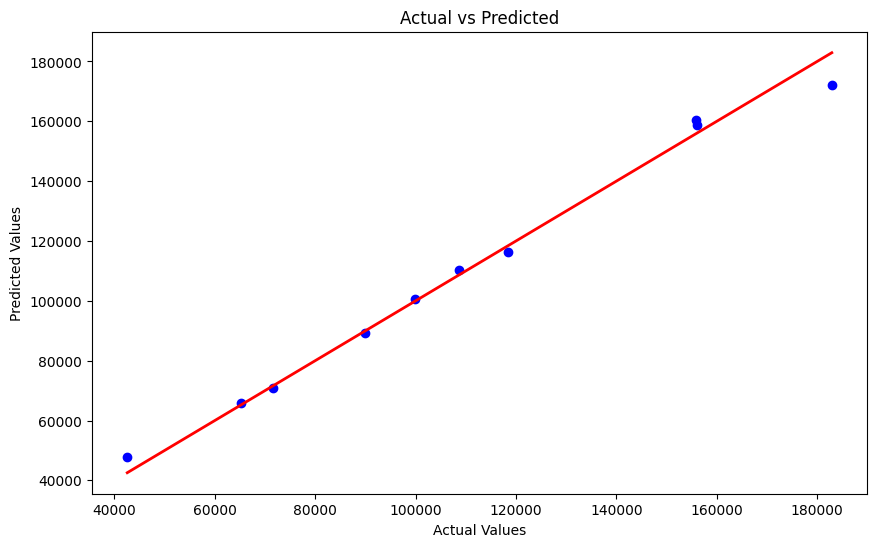

In [413]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', lw=2)  # Line for perfect prediction
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()